## Find the range $W\in[0,?]$

In this notebook we find the range of values of the
sojourn waiting time $W$ given $\lambda, \mu$.

For experiments we take unitary value of
$$ \mu = 1 \frac{user}{time\ unit} $$
and vary $\lambda$ so $\rho<1$.

In [7]:
import sys
sys.path.append("..")
import jsq_ps.models as jsq


R = 1
max_time = 4000
warmup = 200
mu = 1
infty = 130
num_repetitions = 20
lambdas = [n/100 for n in range(1, 100)]
max_sojourns = [-1 for _ in range(len(lambdas))]


i = 0
for lambda_ in lambdas:
    max_sojourn = -1
    
    for _ in range(num_repetitions):
        print(f'λ={lambda_:.2f}, μ={mu}, simulation={_}  ', end='\r')
        S = jsq.Simulation(lambda_, mu, R, max_time, warmup, ps_bar=False)
        S.run(0)
        max_service_time = max([r.service_time for r in S.recs])
        max_sojourn = max_service_time if max_service_time > max_sojourn else max_sojourn

    max_sojourns[i] = max_sojourn
    i += 1

The maximum sojourn time is W=182.32, when ρ=0.99


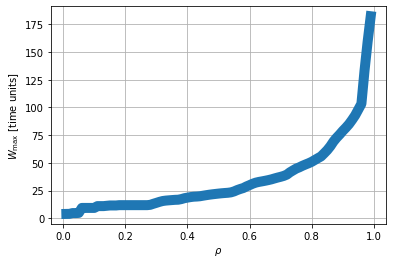

In [20]:
from matplotlib import pyplot as plt


plt.plot(lambdas, max_sojourns, lw=10)
plt.grid()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$W_{\max}$ [time units]');

print(f'The maximum sojourn time is W={max_sojourns[-1]:.2f}, when ρ={lambdas[-1]}')